In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

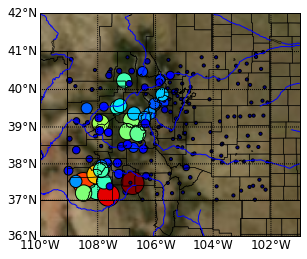

In [2]:
# Create the map
m = Basemap(llcrnrlon=-110.0,llcrnrlat=36.0,\
            urcrnrlon=-101.0,urcrnrlat=42.0,\
            projection='merc',resolution='h')
m.bluemarble()
m.drawcoastlines(linewidth=0.5)
m.drawcounties(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawrivers(linewidth=1, linestyle='solid', color='b')

#Draw parallels and meridians
parallels = np.arange(0.,90.,1.)
m.drawparallels(parallels,labels=[True,False,False,False], fontsize = 12)
meridians = np.arange(10.,350.,2.)
m.drawmeridians(meridians,labels=[True,True,False,True], fontsize = 12)

#read in the data
df_metadata = pd.read_csv('metadata.csv')
lats = np.array(df_metadata.Latitude)
lons = np.array(df_metadata.Longitude)

df_precip = pd.read_csv('COPrecip.csv')

x,y = m(lons, lats)

data = df_precip.iloc[[30000]].replace("NaN", 0).values[0]
data = np.delete(data, 0)

# print len(data)
# print len(lons)
# print len(lats)

sizes = 10*data + 10

sc = plt.scatter(x, y, c=data, s=sizes)

In [9]:
df_precip = pd.read_csv('COPrecip.csv')
df_dateinfo = pd.read_csv('DateInfo.csv')
df = pd.concat([df_dateinfo, df_precip], axis = 1)

In [10]:
df = df.drop('Unnamed: 0', 1)

In [11]:
df = df.fillna(0)

In [12]:
df['yr'] = df['yr'].astype(int)
df['mo'] = df['mo'].astype(int)
df['da'] = df['da'].astype(int)

In [13]:
df['date'] = pd.to_datetime(df.yr*10000 + df.mo*100 + df.da, format='%Y%m%d')

In [14]:
df = df.set_index(pd.DatetimeIndex(df['date']))

In [15]:
df = df.drop('date', 1)
df = df.drop('mo', 1)
df = df.drop('da', 1)
df = df.drop('yr', 1)
df     #This is our 'base' df. It is indexed by timestamp (YYYY-MM-DD), and gives the precipitation in any of 197 different
       #locations, in units of 0.1mm.

V1  V2  V3  V4  V5  V6   V7  V8  V9  V10  ...   V188  V189  V190  \
1900-01-01   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-02   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-03   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-04   0   0   0   0   0   0  1.3   0   0    0  ...      0   0.0     0   
1900-01-05   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-06   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-07   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-08   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-09   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-10   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-11   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-12   0   0   0   0   0   0  5.1   0   0    0  ...      0   0.0     0   
1900-01-13   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-14   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-15   0   0   0   0   0   0  1.3   0   0    0  ...      0   0.0     0   
1900-01-16   0   0   0   0   0   0  3.8   0   0    0  ...      0   2.5     0   
1900-01-17   0   0   0   0   0   0  1.3   0   0    0  ...      0   0.0     0   
1900-01-18   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-19   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-20   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-21   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-22   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-23   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-24   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-25   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-26   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-27   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-28   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-29   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
1900-01-30   0   0   0   0   0   0  5.1   0   0    0  ...      0   0.0     0   
...         ..  ..  ..  ..  ..  ..  ...  ..  ..  ...  ...    ...   ...   ...   
2011-12-02   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
2011-12-03   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
2011-12-04   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
2011-12-05   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
2011-12-06   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
2011-12-07   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
2011-12-08   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
2011-12-09   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
2011-12-10   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
2011-12-11   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
2011-12-12   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
2011-12-13   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
2011-12-14   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
2011-12-15   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
2011-12-16   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
2011-12-17   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
2011-12-18   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
2011-12-19   0   0   0   0   0   0  0.0   0   0    0  ...      0   0.0     0   
2011-12-20  

In [16]:
###############################
# CALCULATIONS  
###############################

#df.groupby([lambda x: x.month]).mean()
#df = df.groupby([lambda x: x.year, lambda x: x.month]).mean()

df_yearlysum = df.groupby([lambda x: x.year]).mean()   #annual precipitation in each location
df_yearlysum_statewide = df_yearlysum.sum(axis = 1)   #annual precipitation, statewide. ie. "over the last century, which has been the rainiest year?"
#df_yearlysum_statewide

df_monthlysum = df.groupby([lambda x: x.month]).mean()   #monthly precipitation in each location
df_monthlysum_statewide = df_monthlysum.sum(axis = 1)   #monthly precipitation, statewide. ie. "over the last century, which has been the rainiest month?"
#df_monthlysum_statewide

df_dailysum = df.groupby([lambda x: x.day]).mean()   #daily precipitation in each location
df_dailysum_statewide = df_dailysum.sum(axis = 1)   #daily precipitation, statewide. ie. "over the last century, which has been the rainiest day?"
#df_dailysum_statewide

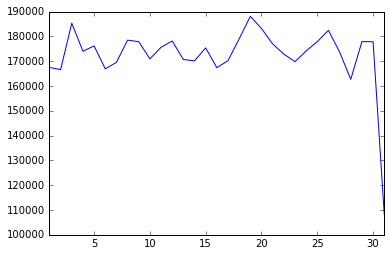

In [52]:
#ax = df_yearlysum_statewide.plot()
#ax = df_monthlysum_statewide.plot()
ax = df_dailysum_statewide.plot()

##Google says CO has an average annual precipitation of 38cm = 3800 tenths of mm

# ax.set_xlabel("time")
# ax.set_ylabel("precipiation")

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib

zmax = 2.8
jet = cm = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=zmax)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

df_metadata = pd.read_csv('metadata.csv')
lats = np.array(df_metadata.Latitude)
lons = np.array(df_metadata.Longitude)

months = ['January', 'Februrary', 'March', 'April', 'May', 'June', 'July', 'August', \
         'September', 'October', 'November', 'December']

matplotlib.rcParams.update({'font.size': 16})

for i in range(1, 13):
    data = df_monthlysum.ix[i]

    fig=plt.figure(figsize=(16, 14))
    ax = Axes3D(fig)
    # Adjust camera angle 
    ax.azim = 250
    ax.dist = 8
    m = Basemap(llcrnrlon=-110.0,llcrnrlat=36.0,\
                urcrnrlon=-101.0,urcrnrlat=42.0, resolution='i')

    ax.add_collection3d(m.drawcoastlines(linewidth=0.25))
    ax.add_collection3d(m.drawstates(linewidth=1))
    ax.add_collection3d(m.drawrivers(color='blue'))
    ax.bar3d(x, y, np.zeros(len(x)), 0.15, 0.15, data, color=scalarMap.to_rgba(data), alpha=0.6)
    ax.xaxis.set_ticks(np.arange(round(min(x)), round(max(x))+1, 1.0))
    ax.yaxis.set_ticks(np.arange(round(min(y)), round(max(y)) + 1, 1.0))
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Precipitation')
    ax.set_zlim([0, zmax])
    ax.xaxis.labelpad = 20
    ax.yaxis.labelpad = 15
    ax.set_title('Average precipitation (in tenths of mm) for ' + months[i - 1])
    scalarMap.set_array(cNorm)
    cb = fig.colorbar(scalarMap, fraction = 0.02, pad=-0.15)
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    matplotlib.rcParams.update({'figure.autolayout': True})
    plt.savefig("MonthlyPlots/plot" + str(i) + ".png", bbox_inches='tight')

NameError: name 'df_monthlysum' is not defined

In [182]:
df_precip = 

['January',
 'Februrary',
 'March',
 'April',
 'May',
 'June',
 'July',
 'AugustSeptember',
 'October',
 'November',
 'December']

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib

df_precip = pd.read_csv('COPrecip.csv')
df_dates = pd.read_csv('DateInfo.csv')

zmax = 10
jet = cm = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=zmax)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

months = ['January', 'Februrary', 'March', 'April', 'May', 'June', 'July', 'August', \
         'September', 'October', 'November', 'December']
month_lengths = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

matplotlib.rcParams.update({'font.size': 16})

# To look at the average precip by day of the year, we need to average by months
# and days concurrently, so loop through both
for i in range(0, 12):
    for j in range(0, month_lengths[i]):
        data = df_precip[df_dates['mo'] == i + 1][df_dates['da'] == j + 1].mean()
        data = np.delete(np.array(data), 0)
        print len(data)
        print len(x)
        # Add one to the month and day since these are not zero-based like
        # Python indices (although Jan 0th sounds like a fun time.)

        fig=plt.figure(figsize=(16, 14))

        ax = Axes3D(fig)
        #ax.add_collection3d(map.drawcoastlines(linewidth=0.25))
        #ax.add_collection3d(map.drawcountries(linewidth=0.35))
        ax.azim = 250
        ax.dist = 8

        m = Basemap(llcrnrlon=-110.0,llcrnrlat=36.0,\
                    urcrnrlon=-101.0,urcrnrlat=42.0, resolution='l')

        ax.add_collection3d(m.drawcoastlines(linewidth=0.25))
        ax.add_collection3d(m.drawstates(linewidth=1))
        #ax.add_collection3d(m.fillcontinents(color='lightgrey',lake_color='aqua'))
        ax.add_collection3d(m.drawrivers(color='blue'))
        ax.bar3d(x, y, np.zeros(len(x)), 0.15, 0.15, data, color=scalarMap.to_rgba(data), alpha=0.6)
        ax.xaxis.set_ticks(np.arange(round(min(x)), round(max(x))+1, 1.0))
        ax.yaxis.set_ticks(np.arange(round(min(y)), round(max(y)) + 1, 1.0))
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_zlabel('Precipitation')
        ax.set_zlim([0, zmax])
        ax.xaxis.labelpad = 20
        ax.yaxis.labelpad = 15
        ax.set_title('Average precipitation (in tenths of mm) for ' + months[i] + \
                     ' ' + str(j + 1))
        scalarMap.set_array(cNorm)
        cb = fig.colorbar(scalarMap, fraction = 0.02, pad=-0.15)
        plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
        matplotlib.rcParams.update({'figure.autolayout': True})
        plt.savefig("DailyPlots/plot" + str(i + 1) + "-" + str(j + 1) + ".png", bbox_inches='tight')


197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197
197

z

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib

df_precip = pd.read_csv('COPrecip.csv')
df_means = df_precip.mean()
data = df_means

zmax = 10
jet = cm = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=zmax)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

matplotlib.rcParams.update({'font.size': 16})

# To look at the average precip by day of the year, we need to average by months
# and days concurrently, so loop through both
data = df_means
data = np.delete(np.array(data), 0)
print len(data)
print len(x)
# Add one to the month and day since these are not zero-based like
# Python indices (although Jan 0th sounds like a fun time.)

fig=plt.figure(figsize=(16, 14))

ax = Axes3D(fig)
ax.azim = 250
ax.dist = 8

m = Basemap(llcrnrlon=-110.0,llcrnrlat=36.0,\
            urcrnrlon=-101.0,urcrnrlat=42.0, resolution='l')

ax.add_collection3d(m.drawcoastlines(linewidth=0.25))
ax.add_collection3d(m.drawstates(linewidth=1))
ax.add_collection3d(m.drawrivers(color='blue'))
ax.bar3d(x, y, np.zeros(len(x)), 0.15, 0.15, data, color=scalarMap.to_rgba(data), alpha=0.6)


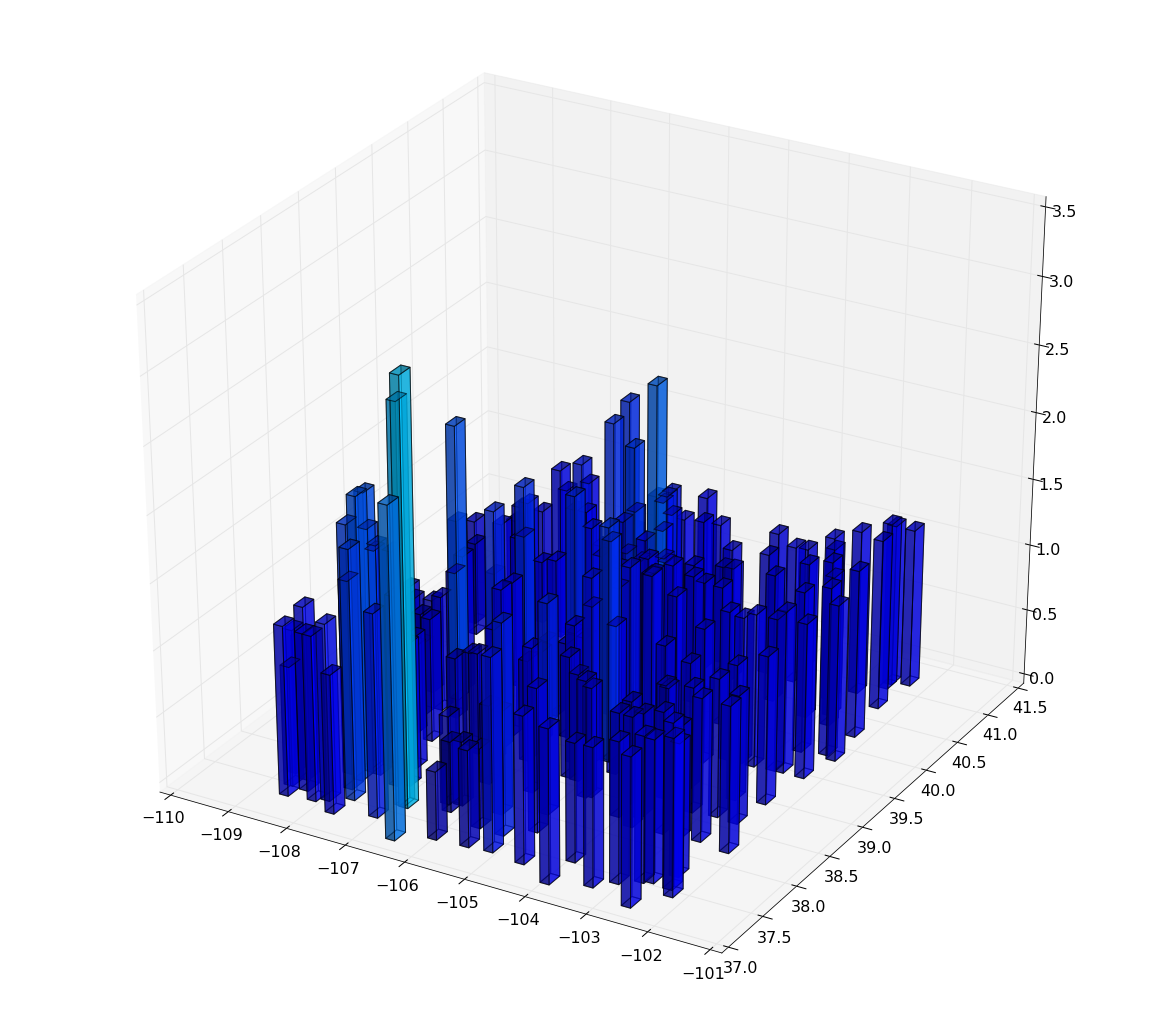

In [12]:
fig=plt.figure(figsize=(16, 14))

ax = Axes3D(fig)

ax.bar3d(lons, lats, np.zeros(len(x)), 0.15, 0.15, data, color=scalarMap.to_rgba(data), alpha=0.6)

58 - 31

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib

df_precip = pd.read_csv('COPrecip.csv')
df_means = df_precip.mean()
data = df_means

matplotlib.rcParams.update({'font.size': 16})

data = df_means
data = np.delete(np.array(data), 0)
zmax = data.max()

jet = cm = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=zmax)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

fig=plt.figure(figsize=(16, 14))

ax = Axes3D(fig)
ax.azim = 250
ax.dist = 8

m = Basemap(llcrnrlon=-110.0,llcrnrlat=36.0,\
            urcrnrlon=-101.0,urcrnrlat=42.0, resolution='l')

ax.add_collection3d(m.drawcoastlines(linewidth=0.25))
ax.add_collection3d(m.drawstates(linewidth=1))
ax.add_collection3d(m.drawrivers(color='blue'))
ax.bar3d(lons, lats, np.zeros(len(x)), 0.15, 0.15, data, color=scalarMap.to_rgba(data), alpha=0.6)
ax.xaxis.set_ticks(np.arange(round(min(lons)), round(max(lons))+1, 1.0))
ax.yaxis.set_ticks(np.arange(round(min(lats)), round(max(lats)) + 1, 1.0))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Precipitation')
ax.set_zlim([0, zmax])
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 15
scalarMap.set_array(cNorm)
cb = fig.colorbar(scalarMap, fraction = 0.02, pad=-0.15)
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
matplotlib.rcParams.update({'figure.autolayout': True})
ax.set_title('Average daily precipitation (in tenths of mm) per site')
plt.savefig("aggregate_precip.png", bbox_inches='tight')

NameError: name 'pd' is not defined

KeyboardInterrupt: 

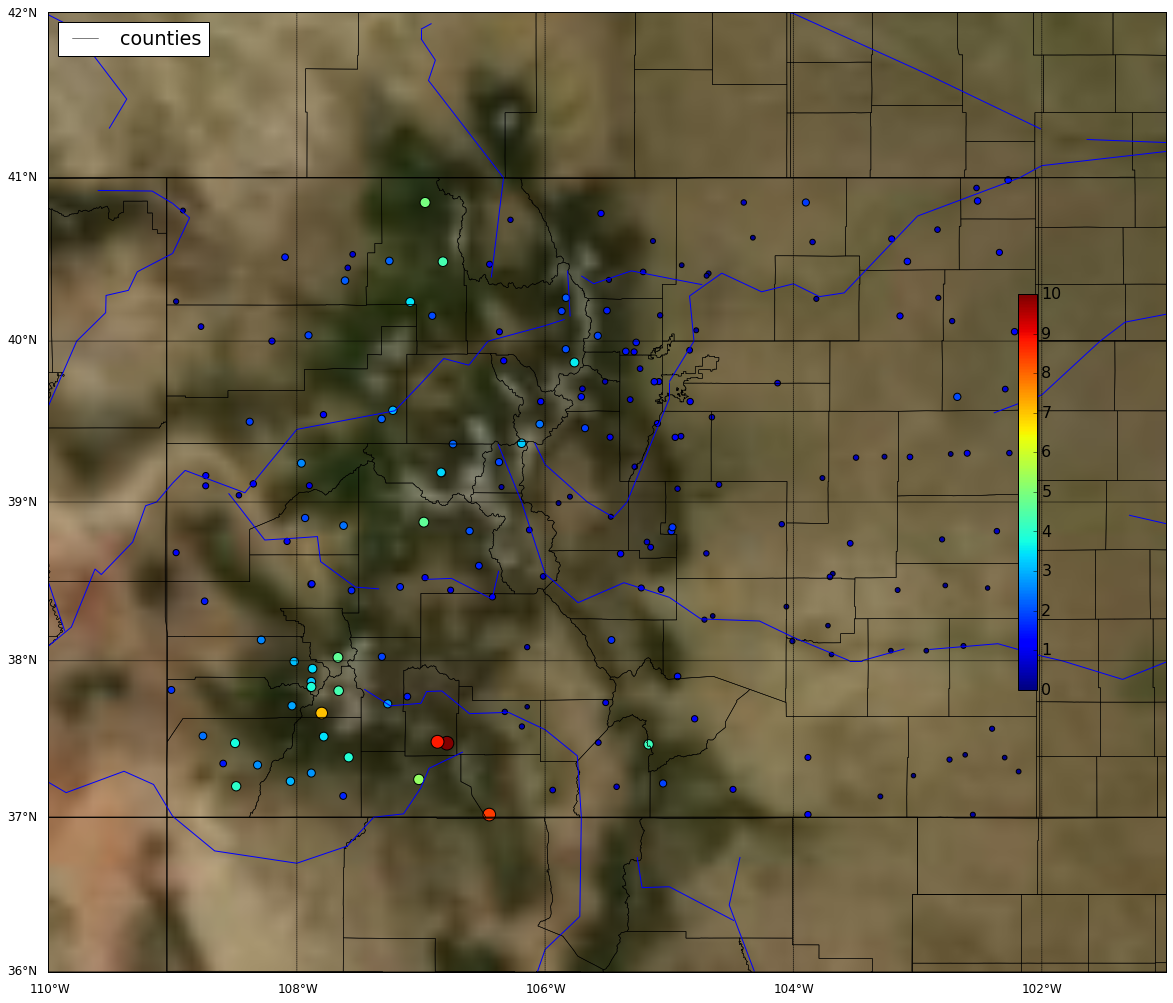

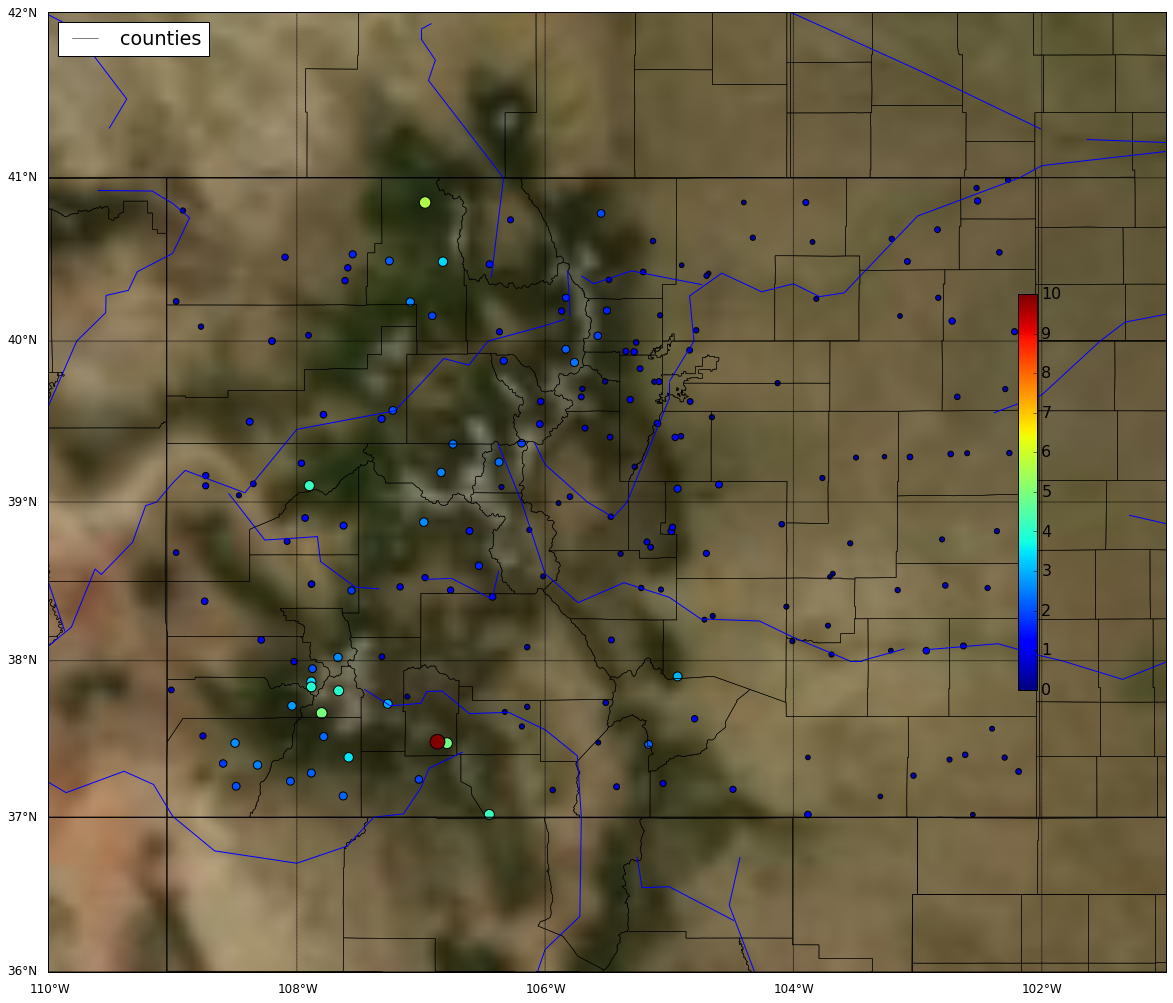

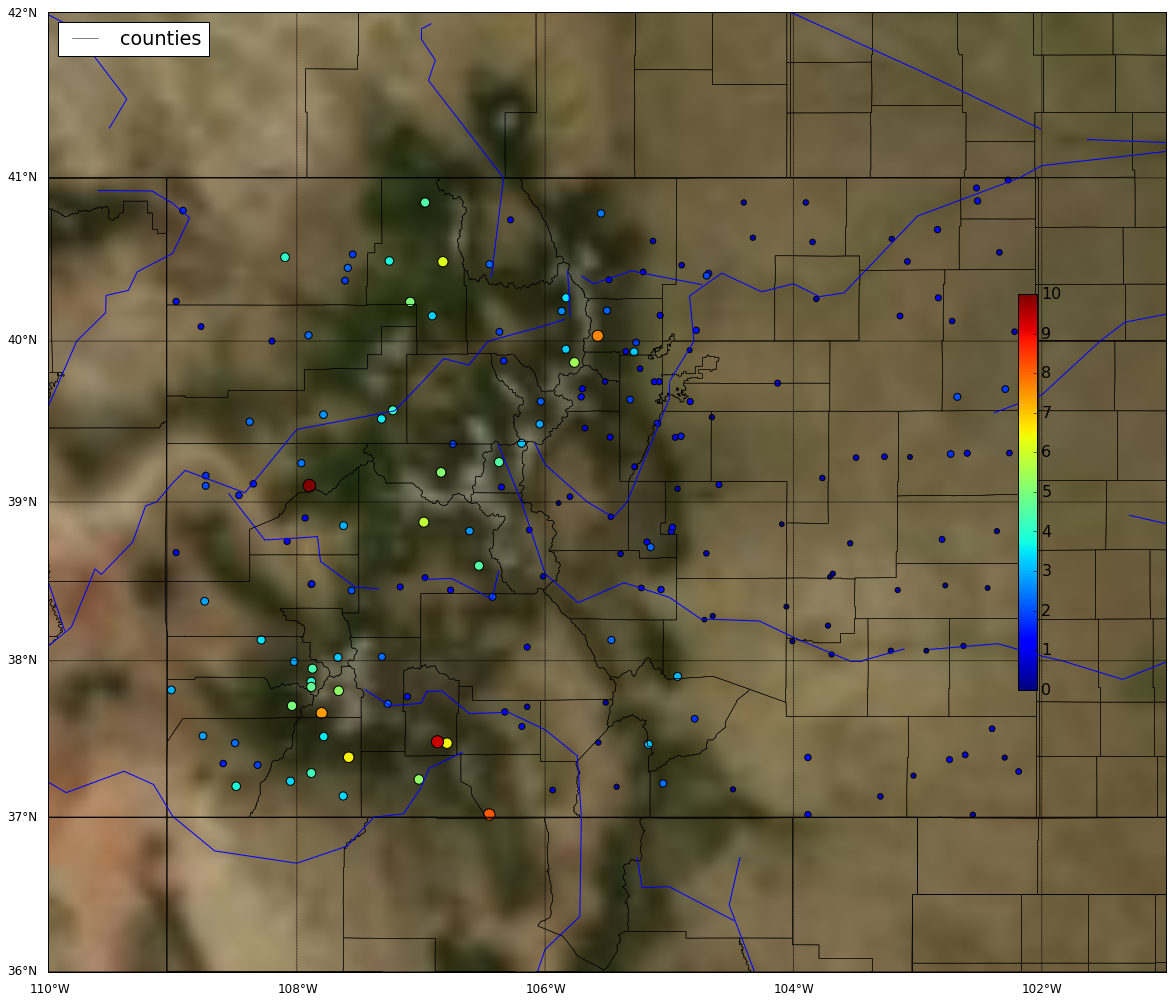

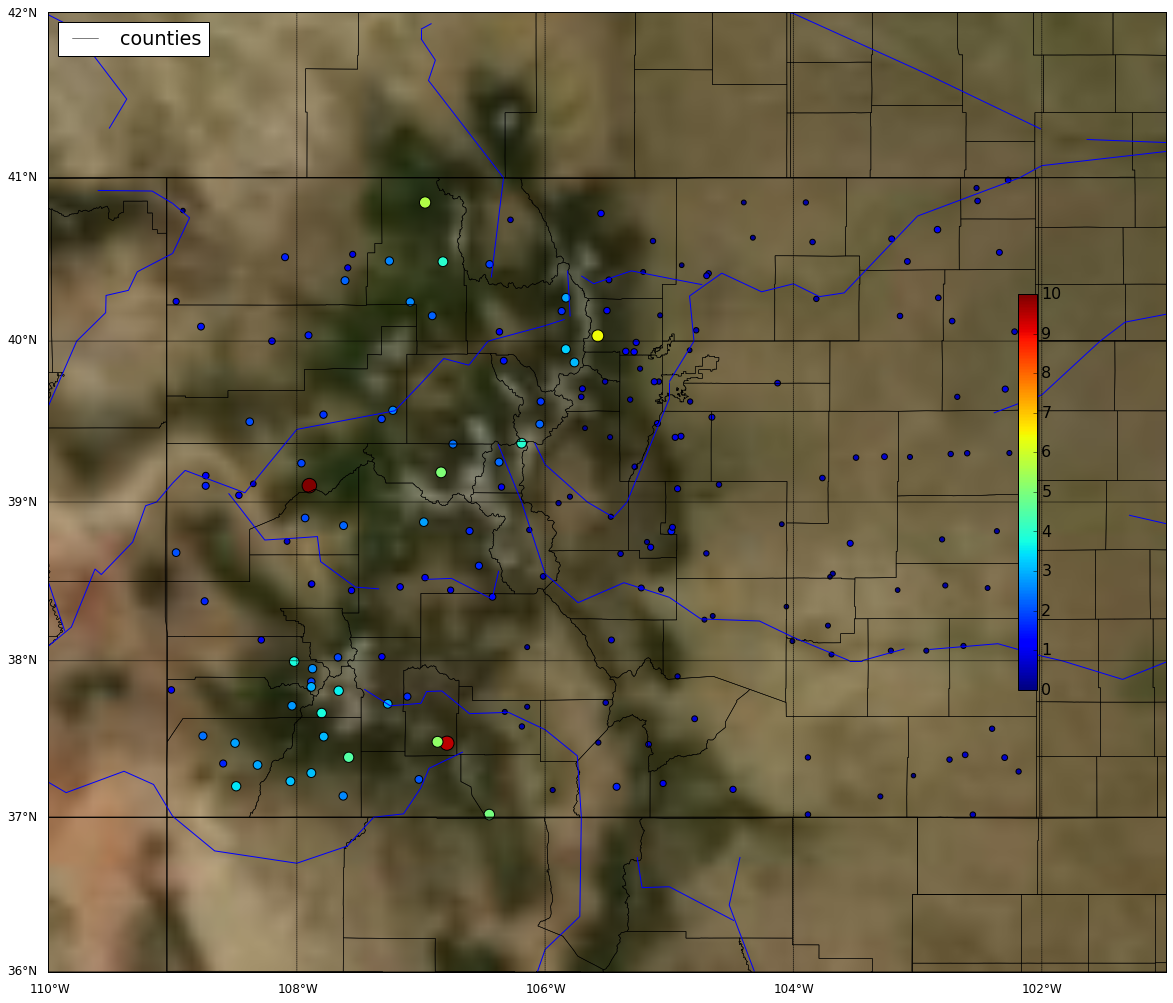

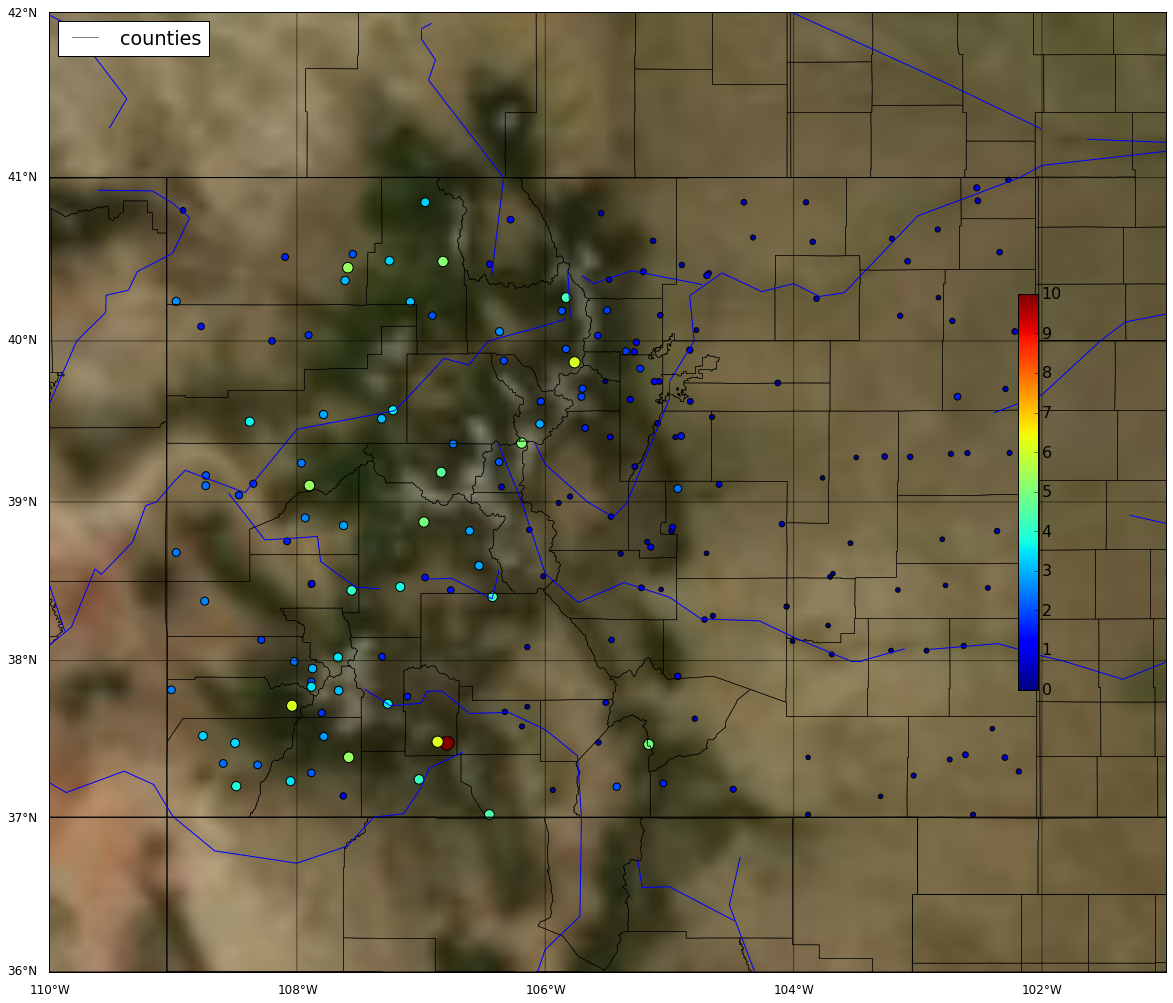

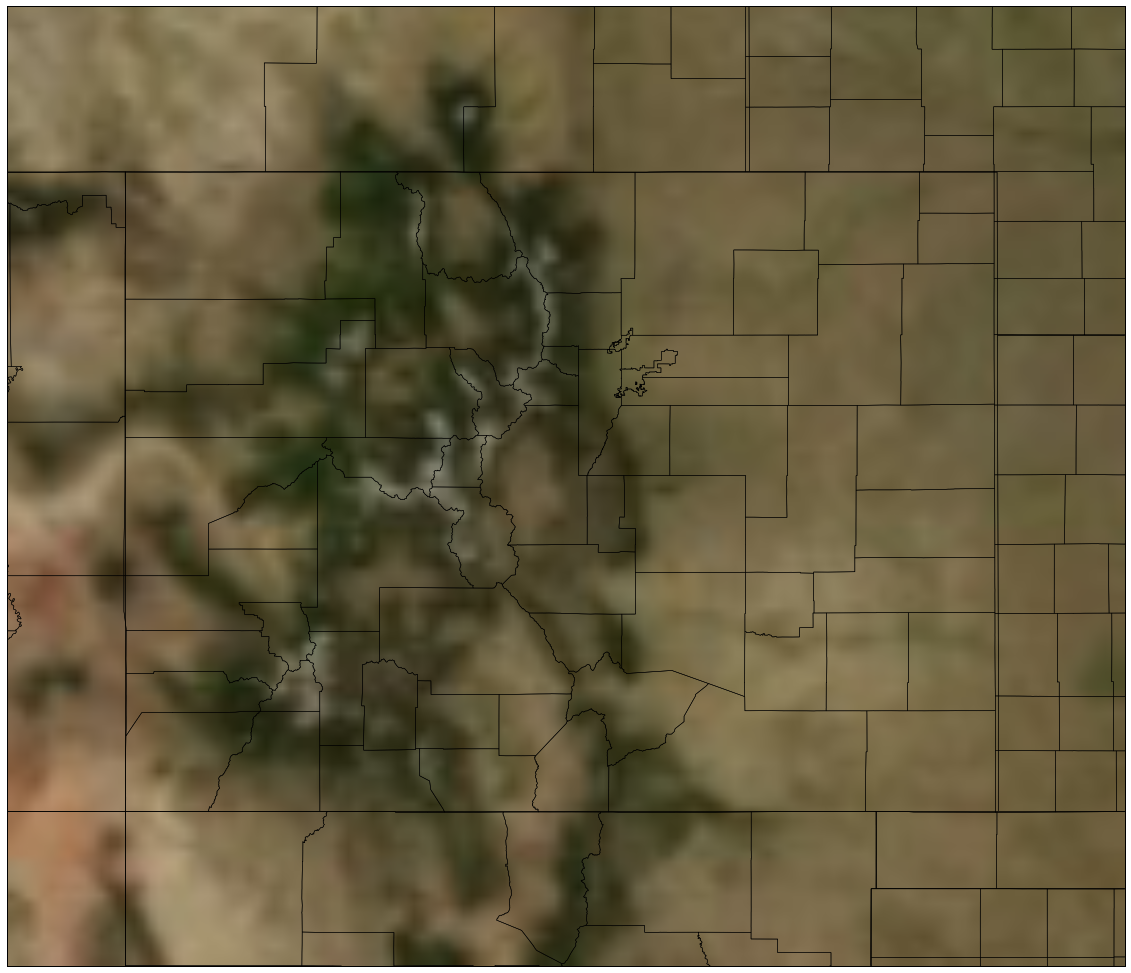

In [29]:
#### SCATTER PLOTS FOR DEVIN ####

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

df_precip = pd.read_csv('COPrecip.csv')
df_dates = pd.read_csv('DateInfo.csv')

zmax = 10
jet = cm = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=zmax)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

months = ['January', 'Februrary', 'March', 'April', 'May', 'June', 'July', 'August', \
         'September', 'October', 'November', 'December']
month_lengths = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
df_metadata = pd.read_csv('metadata.csv')
lats = np.array(df_metadata.Latitude)
lons = np.array(df_metadata.Longitude)

matplotlib.rcParams.update({'font.size': 16})
plotindex = 1

# To look at the average precip by day of the year, we need to average by months
# and days concurrently, so loop through both
for i in range(0, 12):
    for j in range(0, month_lengths[i]):
        data = df_precip[df_dates['mo'] == i + 1][df_dates['da'] == j + 1].mean()
        data = np.delete(np.array(data), 0)
        sizes = 80*data + 20

        fig=plt.figure(figsize=(16, 14))
        m = Basemap(llcrnrlon=-110.0,llcrnrlat=36.0,\
        urcrnrlon=-101.0,urcrnrlat=42.0,\
        projection='merc',resolution='l')
        m.bluemarble()
        m.drawcoastlines(linewidth=0.5)
        m.drawcounties(linewidth=0.5)
        m.drawstates(linewidth=0.5)
        m.drawrivers(linewidth=1, linestyle='solid', color='b')

        #Draw parallels and meridians
        parallels = np.arange(0.,90.,1.)
        m.drawparallels(parallels,labels=[True,False,False,False], fontsize = 12)
        meridians = np.arange(10.,350.,2.)
        m.drawmeridians(meridians,labels=[True,True,False,True], fontsize = 12)

        x,y = m(lons, lats)
        sc = plt.scatter(x, y, c=data, s=sizes)
        
        scalarMap.set_array(cNorm)
        cb = fig.colorbar(scalarMap, fraction = 0.02, pad=-0.15)
        plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
        matplotlib.rcParams.update({'figure.autolayout': True})
        plt.savefig("DailyScatterPlots/plot" + str(plotindex) + ".png", bbox_inches='tight')
        plotindex <- plotindex + 1



In [17]:
import pandas as pd
df_precip = pd.read_csv('COPrecip.csv')
df_means = df_precip.mean()
data = df_means
dateinfo = pd.read_csv('DateInfo.csv')
meta = pd.read_csv('metadata.csv')
data[data > 2]
meta.ix[192]

p = 1

1

# 